*Задание 1*

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
        n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

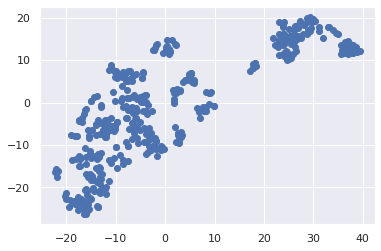

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline

#Загрузите "Boston House Prices dataset"
data = load_boston()

#Создайте датафреймы X и y из этих данных.
X = pd.DataFrame(data.data, columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["target", ])

#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#Постройте модель TSNE на тренировочных данных
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

# постройте диаграмму рассеяния по этим признакам
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

*Задание 2*

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.


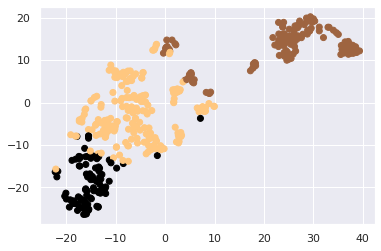

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)
plt.set_cmap('copper')               # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html 
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

Кластер 0 mean('CRIM') = 0.07356558139534884
Кластер 1 mean('CRIM') = 10.797028425196851
Кластер 2 mean('CRIM') = 0.4216602094240837


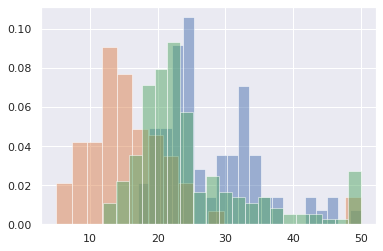

In [71]:
for i in [0,1,2]:
    print(f"Кластер {i} mean('CRIM') = {X_train.loc[labels_train == i, 'CRIM'].mean()}")
    plt.hist(y_train[labels_train == i], bins=20, density=True, alpha=0.5)

plt.show()                     # чот шизофрения какая-то при разбиении на три кластера

*Задание 3*
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

Кластер 0 mean('CRIM') = 0.06206
Кластер 1 mean('CRIM') = 10.165531142857143
Кластер 2 mean('CRIM') = 0.2660788235294118


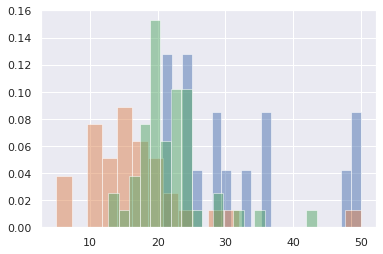

In [77]:
labels_test = kmeans.predict(X_test_scaled)

for i in [0,1,2]:
    print(f"Кластер {i} mean('CRIM') = {X_test.loc[labels_test == i, 'CRIM'].mean()}")
    plt.hist(y_test[labels_test == i], bins=20, density=True, alpha=0.5)
